In [1]:

"""Importing the libraries"""
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy




In [2]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [13]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [4]:
"""Splitting the dataset into the Training set and Test set"""

train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()


In [5]:
"""Splitting the dataset into the Training set and Test set"""

(x_train, x_test, y_train, y_test) = train_test_split(train_x, train_y,
        test_size=0.4, random_state=30)

In [6]:
dt_regressor = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                        with_std=True)), ('estimator',
                        RegressorChain(DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=8,
                                                                     max_features=None,
                                                                     max_leaf_nodes=100,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=20,
                                                                     min_samples_split=10,
                                                                     min_weight_fraction_leaf=0.0,
                                                                     presort='deprecated',
                                                                     random_state=0,
                                                                     splitter='best'),
                        order=[0, 1]))]).fit(x_train, y_train)

In [8]:
""" Predicting the Test set results """

y_pred = dt_regressor.predict(x_test)


In [9]:
"""  summarize performance """

print(f"Model r2_score :{round(r2_score(y_test, y_pred),3)}" )
print(f"Model MEE :{round(mean_euclidean_error(y_test, y_pred),3)}" )



Model r2_score :0.886
Model MEE :4.063


Text(0, 0.5, 'Residuals')

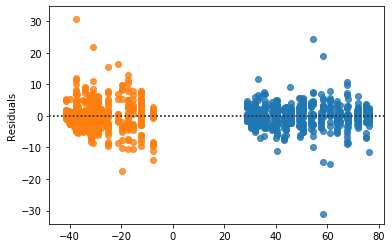

In [10]:
"""Visualising model results """
# we expect to see the result have zero mean distributed evenly around the x-axis 
sns.residplot(y_pred[:, 0], y_test[:, 0])
sns.residplot(y_pred[:, 1], y_test[:, 1]).set_ylabel('Residuals')

In [12]:
""" Predicting the cup test set results and dump to csv"""

y_cup = dt_regressor.predict(x_cup_test)
# pd.DataFrame(y_cup).to_csv("coffee_ML-CUP20-TS.csv",header=None)


NameError: name 'x_cup_test' is not defined